In [3]:
import keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

In [6]:
model = Sequential()

model.add(Conv2D(filters=96, input_shape = (227,227,3), kernel_size=(11,11),
                strides = (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5),
                strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3,3),
                strides = (1,1), activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3,3),
                strides = (1,1), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3),
                strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

model.add(Dense(9216, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(4096, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train = ImageDataGenerator(rescale = 1 / 255., horizontal_flip = True, zoom_range = 0.2)
test = ImageDataGenerator(rescale = 1 / 255.)

In [12]:
train_set = train.flow_from_directory('dog_cat/dog_cat/training_set/',
                                     target_size = (227, 227),
                                     batch_size = 32, class_mode = 'binary')
test_set = test.flow_from_directory('dog_cat/dog_cat/test_set/',
                                   target_size = (227, 227),
                                   batch_size = 32, class_mode = 'binary')

model.fit_generator(train_set, epochs = 10, validation_data = test_set, steps_per_epoch = 20)

model.save('alex_net.h5')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 740s 37s/step - loss: 0.7666 - accuracy: 0.4969 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
 8/20 [===========>..................] - ETA: 14:53 - loss: 0.6880 - accuracy: 0.5547

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (8.584388). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 9/20 [============>.................] - ETA: 12:26 - loss: 0.6875 - accuracy: 0.5556

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (8.433853). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


20/20 [==============================] - 851s 43s/step - loss: 0.6942 - accuracy: 0.5172 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 562s 28s/step - loss: 0.6935 - accuracy: 0.4953 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 339s 17s/step - loss: 0.6935 - accuracy: 0.4922 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 5/10
19/20 [===========================>..] - ETA: 20s - loss: 0.6930 - accuracy: 0.5181

C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 225 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/20 [==============================] - 756s 38s/step - loss: 0.6929 - accuracy: 0.5219 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 6/10
20/20 [==============================] - 488s 24s/step - loss: 0.6936 - accuracy: 0.4891 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 7/10
20/20 [==============================] - 174s 9s/step - loss: 0.6935 - accuracy: 0.4563 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 8/10
20/20 [==============================] - 145s 7s/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 9/10
20/20 [==============================] - 345s 17s/step - loss: 0.6931 - accuracy: 0.5203 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 10/10
 6/20 [========>.....................] - ETA: 7:47 - loss: 0.6933 - accuracy: 0.4844

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (4.855157). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 7/20 [=========>....................] - ETA: 6:19 - loss: 0.6933 - accuracy: 0.4911

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (4.542198). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


20/20 [==============================] - 382s 19s/step - loss: 0.6933 - accuracy: 0.4938 - val_loss: 0.6961 - val_accuracy: 0.5000


In [13]:
model.history.history

{'val_loss': [0.6934024691581726,
  0.6930009722709656,
  0.6972755789756775,
  0.690684974193573,
  0.6963951587677002,
  0.6946011781692505,
  0.6926448345184326,
  0.691622257232666,
  0.6920418739318848,
  0.6960546374320984],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 'loss': [0.7666201025247574,
  0.6941777676343918,
  0.6935269176959992,
  0.693455696105957,
  0.692861533164978,
  0.6936049997806549,
  0.6935084819793701,
  0.6932225495576858,
  0.6931414008140564,
  0.6932567685842514],
 'accuracy': [0.496875,
  0.5171875,
  0.4953125,
  0.4921875,
  0.521875,
  0.4890625,
  0.45625,
  0.5015625,
  0.5203125,
  0.49375]}

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 384)         1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 256)        

In [14]:
import matplotlib.pyplot as plt

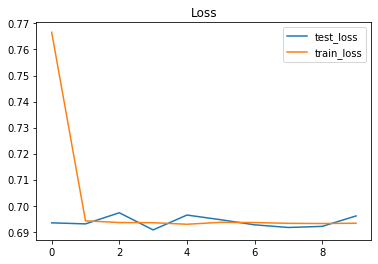

In [15]:
plt.plot(model.history.history['val_loss'], Label = 'test_loss')
plt.plot(model.history.history['loss'], Label = 'train_loss')
plt.title('Loss')
plt.legend()
plt.show()

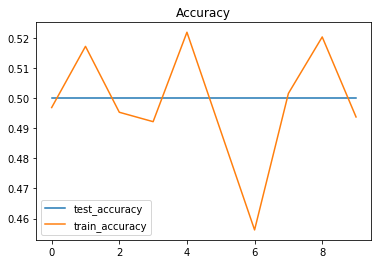

In [16]:
plt.plot(model.history.history['val_accuracy'], Label = 'test_accuracy')
plt.plot(model.history.history['accuracy'], Label = 'train_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [17]:
import numpy as np
import cv2

In [62]:
img = cv2.imread('cat_1.jpg')

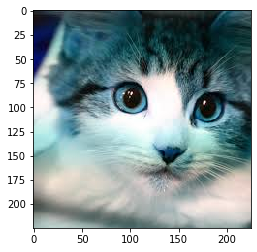

In [63]:
plt.imshow(img)

In [64]:
img.shape

(225, 225, 3)

In [65]:
img = cv2.resize(img, (227, 227))

In [66]:
img = np.reshape(img, (1, 227, 227, 3))

In [67]:
model.predict(img)

array([[0.5038373]], dtype=float32)